### Avinash G. Kori | ED15B006 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def imshow(args):
    if len(args)==1:
        plt.imshow(args[0], interpolation='none')
    else:
        n=int(len(args)**0.5)
        plt.figure(figsize=(15, 15))
        for i in range(len(args)):
            plt.subplot(n + 1, n,i+1)
            plt.imshow(args[i])
    plt.show()

# Question 1

In [2]:
class Question1(object):
    def __init__(self):
        """
        """
        # define probabilities
        self.P = np.array([
                [[0.5   , 0.25 , 0.250 ],
                 [1./16., 3./4., 3./16.],
                 [1./4. , 1./8., 5./8. ]],
                [[1./2. , 0.   , 1./2. ],
                 [1./16. , 7./8., 1./16.],
                 [0.    ,   1. , 0     ]],
                [[1./4. , 1./4., 1./2. ],
                 [1./8. , 3./4., 1./8. ],
                 [3./4. ,1./16., 3./16.]]
            ])
        # define rewards
        self.g = np.array([
                [[10., 4., 8.],
                 [8.,  2., 4.],
                 [4.,  6., 4.]],
                [[14., 0., 18.],
                 [8., 16., 08.],
                 [0.,  0., 0. ]],
                [[10., 2., 8. ],
                 [6. , 4., 2. ],
                 [4. , 0., 8.]]
            ])
        # init J
        self.J = np.array([[[0., 0., 0.]]]) # 3x1
        
    def Toperator(self):
        """
            Applies T operator for current J
        """
        self.J = np.max(np.sum(self.P*(self.g + self.J), \
                                       axis=2), axis=0)
        return self.J
    
    def optPolicy(self):
        """
            Finds optimal policy for current states
        """
        self.optP = (np.argmax(np.sum(self.P*(self.g + self.J), \
                                      axis=2), axis=0)+1)
        return self.optP 
    
    def Iterate(self, N = 1000, display_ = True):
        """
            Input Args:
                N: number of iterations
                display: bool for displaying plots
            returns:
                J: optimal J
                P: optimal policy
        """
        # TODO: display fn
        cost_hist, policy_hist = [], []
        for _ in range(N): 
            cost_hist.append(self.Toperator().reshape(3))
            policy_hist.append(self.optPolicy().reshape(3))
        return self.J.reshape(1,3)[0], self.optP.reshape(1,3)[0]
    

question1 = Question1()
cost10_, policy10_ = question1.Iterate(N = 10)

question1 = Question1()
cost20_, policy20_ = question1.Iterate(N = 20)

### Q1.a Optimal Cost after 10 and 20 iteration 

In [3]:
print ("Optimal Cost after N = 10:  {} \n".format(cost10_) +\
       "Optimal Cost after N = 20:  {}".format(cost20_) + '\n')

Optimal Cost after N = 10:  [130.22625127 139.02249011 125.42195281] 
Optimal Cost after N = 20:  [266.22281269 275.02281248 261.42281245]



### Q1.b Optimal Policy after 10 and 20 iteration 

In [4]:
print ("Optimal Policy after N = 10:  {} \n".format(list(policy10_)) +\
       "Optimal Policy after N = 20:  {}".format(list(policy20_)) + '\n')

Optimal Policy after N = 10:  [2, 2, 2] 
Optimal Policy after N = 20:  [2, 2, 2]



### Q1.c

As the highest reward is associated with town B and action 2, and highest transition probability from any town to town B is also associated with action 2.

This is the reason why taking action 2 (Go to the nearest taxi stand and wait in line) irrespective of state is optimal policy

<hr>

# Question 2

# Action mapping 

### 0 = ($\uparrow$, violet) up, 1 = ($\rightarrow$, blue) right, 2 = ($\downarrow$, green) down, 3 = ($\leftarrow$, yellow) left


In [5]:
class Question2(object):
    def __init__(self, variant = 1):
        """
            variant: variant of grid world
            variant = 1 (terminal state at (3, 0))
            variant = 2 (terminal state at (9, 9))
        """
        self.variant = variant
        # init Probabilities
        self.P = np.zeros((10, 10, 4, 10, 10))
        self.J = np.zeros((1, 1, 1, 10, 10))
        # init all rewards with -1
        self.g = np.zeros((10, 10, 4, 10, 10)) - 1
        # generate Probabilities
        self.P = self.generateP()
        # generate Rewards
        self.g = self.generateR()
        
    def generateP(self):
        """
            Generates and returns P matrix 
            5th order Tensor
        """
        for ix in range(self.P.shape[0]):
            for iy in range(self.P.shape[1]):
                for action in range(self.P.shape[2]):
                    temp = np.zeros((10, 10))
                    if action == 0: 
                        temp[ix, min(iy + 1, 9)] = 0.8 
                        temp[max(0, ix - 1), iy] = 0.1 
                        temp[min(ix + 1, 9), iy] = 0.1 
                    elif action == 1:
                        temp[ix, min(iy + 1, 9)] = 0.1 
                        temp[ix, max(iy - 1, 0)] = 0.1 
                        temp[min(ix + 1, 9), iy] = 0.8 
                    elif action == 2:
                        temp[ix, max(iy - 1, 0)] = 0.8
                        temp[min(ix + 1, 9), iy] = 0.1
                        temp[max(ix - 1, 0), iy] = 0.1
                    else:
                        temp[max(ix - 1, 0), iy] = 0.8
                        temp[ix, min(iy + 1, 9)] = 0.1
                        temp[ix, max(iy - 1, 0)] = 0.1
                        
                    if (ix, iy) == (3, 2) or (ix, iy) == (4, 2)\
                      or (ix, iy) == (5, 2) or (ix, iy) == (6, 2):
                        temp = np.zeros((10, 10))
                        temp[0, 0] = 1
                    
                    if (ix, iy) == (7, 1):
                        temp = np.zeros((10, 10))
                        temp[7, 9] = 1
                    
                    if ((ix, iy) == (3, 0) and self.variant == 1) \
                       or (self.variant == 2 and (ix, iy) == (9, 9)):
                        temp = np.zeros((10, 10))

                    self.P[ix, iy, action] = temp
        return self.P
    
    def generateR(self):
        """
            Generates and returns R matrix 
            5th order Tensor
        """
        for ix in range(self.P.shape[0]):
            for iy in range(self.P.shape[1]):
                for action in range(self.P.shape[2]):
                    if self.variant == 2 and \
                    ((ix, iy, action) == (8, 9, 1) or \
                        (ix, iy, action) == (9, 8, 0)):
                        self.g[ix, iy, action, 9, 9] = 100
                        
                    if self.variant == 1 and \
                     ((ix, iy, action) == (2, 0, 1) or \
                        (ix, iy, action) == (3, 1, 2)\
                        or(ix, iy, action) == (4, 0, 3)):
                        self.g[ix, iy, action, 3, 0] = 100
        return self.g
                        
    def Toperator(self):
        """
            Applies T operator for current J
        """
        self.J = np.max(np.sum(self.P*(self.g +\
                                self.J),\
                               axis=(3, 4)), axis=2)
        return self.J
    
    def optPolicy(self):
        """
            Finds optimal policy for current states
        """
        self.optP = np.argmax(np.sum(self.P*(self.g +\
                                    self.J),\
                                     axis=(3, 4)), axis=2)
        return self.optP
    
    def Iterate(self, N = 1000, display_ = True):
        """
            Input Args:
                N: number of iterations
                display: bool for displaying plots
            returns:
                J: optimal J
                P: optimal policy
                cost_history from 0 to N
                policy_history from 0 to N
        """
        cost_hist, policy_hist = [], []
        for _ in range(N): 
            cost_hist.append(np.rot90(self.Toperator().reshape(10, 10)))
            policy_hist.append(self.optPolicy().reshape(10, 10))
        if display_: imshow(cost_hist)
        return (list(self.J.reshape(10, 10)), list(self.optP.reshape(10,10)),
               cost_hist, policy_hist)  

### Q2.a
+ Stopping criteria is decided based on change in value of J from previous iteration
+ ($J_{i+1} - J_i$) < T (T is threshold for convergence)

### Q2.b

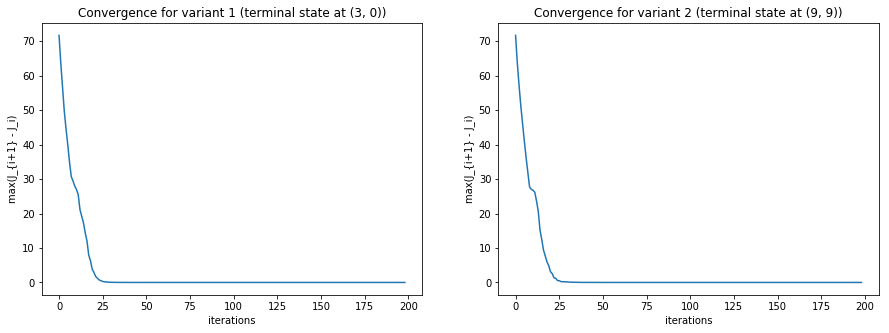

In [6]:
question2 = Question2()
j, p, Chist, Phist = question2.Iterate(N=200, display_ = False)

diff_hist = np.diff(np.array(Chist), axis = 0)
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(np.max(diff_hist, axis = (1,2)))
plt.title('Convergence for variant 1 (terminal state at (3, 0))')
plt.xlabel('iterations')
plt.ylabel('max(J_{i+1} - J_i)')

question2 = Question2(2)
j, p, Chist, Phist = question2.Iterate(N=200, display_ = False)

diff_hist = np.diff(np.array(Chist), axis = 0)
plt.subplot(1, 2, 2)
plt.plot(np.max(diff_hist, axis = (1,2)))
plt.title('Convergence for variant 2 (terminal state at (9, 9))')
plt.xlabel('iterations')
plt.ylabel('max(J_{i+1} - J_i)')
plt.show()

### Q2.c
+ Based on above plots convergence for Variant 1 can be considered around 25th iteration and for Variant 2 around 25th iteration

#### Q2.c Variant 1

Policy => 0: up, 1: right, 2: down, 3: left
[[0 2 2 2 2 2 2 1 1 0]
 [2 2 2 2 2 2 2 2 0 0]
 [2 2 2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 2 2 3]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 3 2]
 [2 2 2 2 2 2 2 3 3 3]
 [2 2 2 0 0 0 0 3 3 3]
 [2 1 2 2 2 3 3 0 2 2]
 [1 1 1 0 3 3 3 3 3 3]]


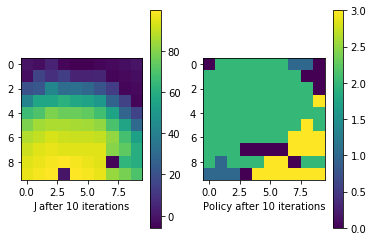

In [7]:
question2 = Question2()
j, p, Chist, Phist = question2.Iterate(N=10, display_ = False)

plt.subplot(1, 2, 1)
plt.imshow(np.rot90(j))
plt.colorbar()
plt.xlabel("J after 10 iterations")
plt.subplot(1, 2, 2)
plt.imshow(np.rot90(p))
plt.colorbar()
plt.xlabel("Policy after 10 iterations")
print ("Policy => 0: up, 1: right, 2: down, 3: left")
print (np.rot90(p))

Policy => 0: up, 1: right, 2: down, 3: left
[[2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 3 2]
 [2 2 2 2 2 2 2 3 3 3]
 [2 2 2 2 2 2 2 3 3 3]
 [2 2 2 0 0 0 0 3 3 3]
 [1 1 2 2 2 3 3 0 2 2]
 [1 1 1 0 3 3 3 3 3 3]]


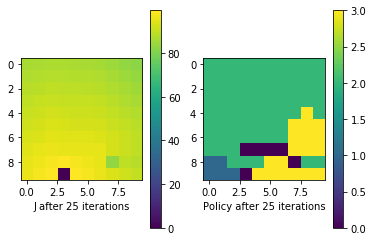

In [8]:
question2 = Question2()
j, p, Chist, Phist = question2.Iterate(N=25, display_ = False)

plt.subplot(1, 2, 1)
plt.imshow(np.rot90(j))
plt.colorbar()
plt.xlabel("J after 25 iterations")
plt.subplot(1, 2, 2)
plt.imshow(np.rot90(p))
plt.colorbar()
plt.xlabel("Policy after 25 iterations")
print ("Policy => 0: up, 1: right, 2: down, 3: left")
print (np.rot90(p))

#### Q2.c Variant 2

Policy => 0: up, 1: right, 2: down, 3: left
[[1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 0 0]
 [2 2 1 1 1 1 1 1 0 0]
 [2 2 2 1 1 1 1 2 2 0]
 [1 2 2 0 0 0 0 1 2 3]
 [1 1 1 2 2 2 2 0 3 3]
 [1 1 1 1 1 1 1 0 3 3]]


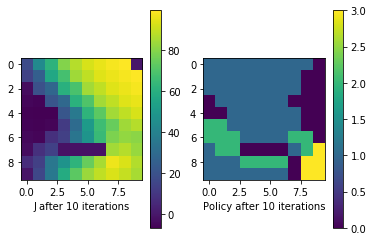

In [9]:
question2 = Question2(2)
j, p, Chist, Phist = question2.Iterate(N=10, display_ = False)

plt.subplot(1, 2, 1)
plt.imshow(np.rot90(j))
plt.colorbar()
plt.xlabel("J after 10 iterations")
plt.subplot(1, 2, 2)
plt.imshow(np.rot90(p))
plt.colorbar()
plt.xlabel("Policy after 10 iterations")
print ("Policy => 0: up, 1: right, 2: down, 3: left")
print (np.rot90(p))

Policy => 0: up, 1: right, 2: down, 3: left
[[1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 1 1 0 0]
 [1 1 1 0 1 1 1 2 2 0]
 [2 2 2 0 0 0 0 2 2 3]
 [1 1 1 2 1 1 1 0 3 3]
 [1 1 1 1 1 1 1 0 3 3]]


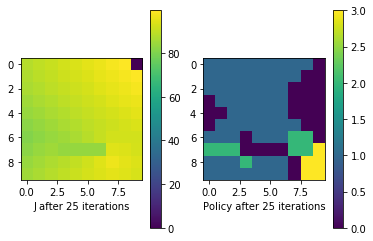

In [10]:
question2 = Question2(2)
j, p, Chist, Phist = question2.Iterate(N=25, display_ = False)

plt.subplot(1, 2, 1)
plt.imshow(np.rot90(j))
plt.colorbar()
plt.xlabel("J after 25 iterations")
plt.subplot(1, 2, 2)
plt.imshow(np.rot90(p))
plt.colorbar()
plt.xlabel("Policy after 25 iterations")
print ("Policy => 0: up, 1: right, 2: down, 3: left")
print (np.rot90(p))

### Q2.d
+ Once value iteration is converged the cost and policy per state remains constant
+ After convergence action at each state leads to terminal state high reward (+100)

<hr>

### Reference
+ Prashanth L. A. CS6700: Reinforcement learning Course notes, 2018
+ Dimitri P. Bertsekas. Dynamic Programming and Optimal Control, vol. I. Athena Scientific, 2017.